In [204]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg



In [2]:
# Understanding data - csv
# image_path = '/media/nicolas/Lenovo/Projects/UnderstandingAmazon/data'

#https://www.kaggle.com/competitions/planet-understanding-the-amazon-from-space

#inspiration from
#https://www.kaggle.com/code/robinkraft/getting-started-with-the-data-now-with-docs

In [3]:
train_data = pd.read_csv(os.path.join('data','train_v2.csv'))

In [4]:
train_data.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [5]:
#so many individual classes
class_num = train_data['tags'].value_counts()
class_num

clear primary                                               13636
partly_cloudy primary                                        3630
cloudy                                                       2089
clear primary water                                          1850
agriculture clear primary road                               1680
                                                            ...  
agriculture clear cultivation cultivation road                  1
artisinal_mine bare_ground partly_cloudy primary road           1
agriculture clear conventional_mine primary road                1
clear conventional_mine habitation road                         1
agriculture partly_cloudy primary road conventional_mine        1
Name: tags, Length: 449, dtype: int64

In [11]:
from collections import Counter
counter = Counter()
for pic in train_data['tags'].str.split():
    counter.update(pic)


In [12]:
individual_label = pd.DataFrame(counter.values(),counter.keys()).sort_values(by =0 , ascending = False)
individual_label.rename({0:'count'},axis = 1,inplace = True)
individual_label = individual_label.reset_index()

In [13]:
individual_label.rename({'index':'label'},axis = 1,inplace = True)

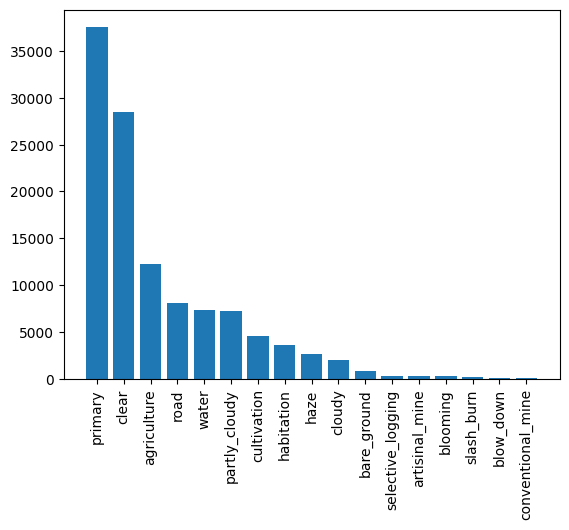

In [14]:
plt.bar(individual_label['label'],individual_label['count'])
plt.xticks(rotation = 90)
plt.show()

In [15]:
individual_label

,label,count
0,primary,37513
1,clear,28431
2,agriculture,12315
3,road,8071
4,water,7411
5,partly_cloudy,7261
6,cultivation,4547
7,habitation,3660
8,haze,2697
9,cloudy,2089


In [16]:
#Chips that are labeled as cloudy should have no other labels, but there may be labeling errors
#correct

In [17]:
train_data[~(train_data['tags'].str.contains('partly_cloudy'))&
            (train_data['tags'].str.contains('cloudy'))&
            (train_data['tags'].str.split().apply(lambda x:len(x)) != 1)]


,image_name,tags


In [18]:
#tags per image one hot
for tag in individual_label['label']:
    train_data[tag] = train_data['tags'].apply(lambda x:1 if tag in x.split() else 0)

In [19]:
train_data.head()

,image_name,tags,primary,clear,agriculture,road,water,partly_cloudy,cultivation,habitation,haze,cloudy,bare_ground,selective_logging,artisinal_mine,blooming,slash_burn,blow_down,conventional_mine
0,train_0,haze primary,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [20]:
weather_labels = ['haze','partly_cloudy','clear','cloudy']

In [21]:
train_data[weather_labels].sum()

haze              2697
partly_cloudy     7261
clear            28431
cloudy            2089
dtype: int64

In [22]:
#from notebook
def heatmap_matrix(labels):
    numeric_df = train_data[individual_label['label']][labels]
    matrix = numeric_df.T.dot(numeric_df)
    sns.heatmap(matrix,cmap='Blues')
    return matrix

,primary,clear,agriculture,road,water,partly_cloudy,cultivation,habitation,haze,cloudy,bare_ground,selective_logging,artisinal_mine,blooming,slash_burn,blow_down,conventional_mine
primary,37513,27668,11972,7728,7001,7175,4455,3469,2670,0,683,340,324,332,209,98,94
clear,27668,28431,9150,6295,5502,0,3527,3090,0,0,747,308,307,311,173,85,70
agriculture,11972,9150,12315,6034,2712,2493,3377,2737,672,0,225,65,38,32,119,22,24
road,7728,6295,6034,8071,2125,1382,1294,2786,394,0,323,151,110,10,36,2,59
water,7001,5502,2712,2125,7411,1295,868,915,613,0,206,49,299,16,24,3,26
partly_cloudy,7175,0,2493,1382,1295,7261,748,441,0,0,74,27,27,17,33,13,28
cultivation,4455,3527,3377,1294,868,748,4477,895,202,0,89,58,18,35,126,8,4
habitation,3469,3090,2737,2786,915,441,895,3660,129,0,163,13,29,4,41,3,36
haze,2670,0,672,394,613,0,202,129,2697,0,41,5,5,4,3,0,2
cloudy,0,0,0,0,0,0,0,0,0,2089,0,0,0,0,0,0,0


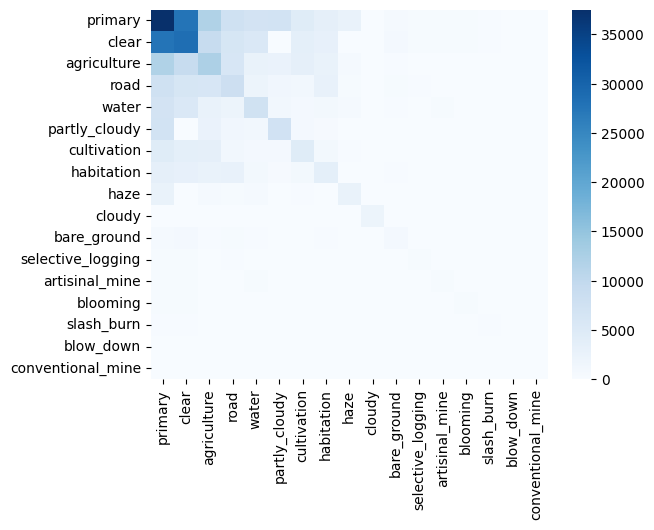

In [23]:
heatmap_matrix(individual_label['label'])

In [24]:
rare_individual = individual_label[individual_label['count'] < 2000]

In [25]:
rare_individual

,label,count
10,bare_ground,862
11,selective_logging,340
12,artisinal_mine,339
13,blooming,332
14,slash_burn,209
15,blow_down,101
16,conventional_mine,100


In [26]:
#Images

In [27]:
#select images to display

In [28]:
top_10_classes = class_num[:10]
last_10_classes = class_num[-10:]

In [51]:
top_10_classes.index

Index(['clear primary', 'partly_cloudy primary', 'cloudy',
       'clear primary water', 'agriculture clear primary road',
       'agriculture clear primary', 'haze primary',
       'agriculture clear cultivation primary',
       'agriculture clear habitation primary road',
       'agriculture clear primary water'],
      dtype='object')

In [106]:
#first mount disk
image_path = '/media/nicolas/Lenovo/Projects/UnderstandingAmazon/data'
image_jpg_list = os.path.join(image_path,'train-jpg')

In [168]:
def random_sample(labels):
    images_to_show = []
    for image in labels.index:
        image_name = train_data[train_data['tags']== image].sample(1)['image_name'].iloc[0]
        images_to_show.append([str(image_name)+'.jpg',image])
    return images_to_show

In [229]:
def plot_images(images):
    fig = plt.figure(figsize=(20, 20))
    for i,file in enumerate(random_sample(images)):
        ax = fig.add_subplot(5, 2, i+1)
        ax.set_title(file[1],fontsize = 8)
        fig.set_figheight(20)
        fig.set_figwidth(10)
        img = mpimg.imread(os.path.join(image_jpg_list,file[0]))
        plt.imshow(img)

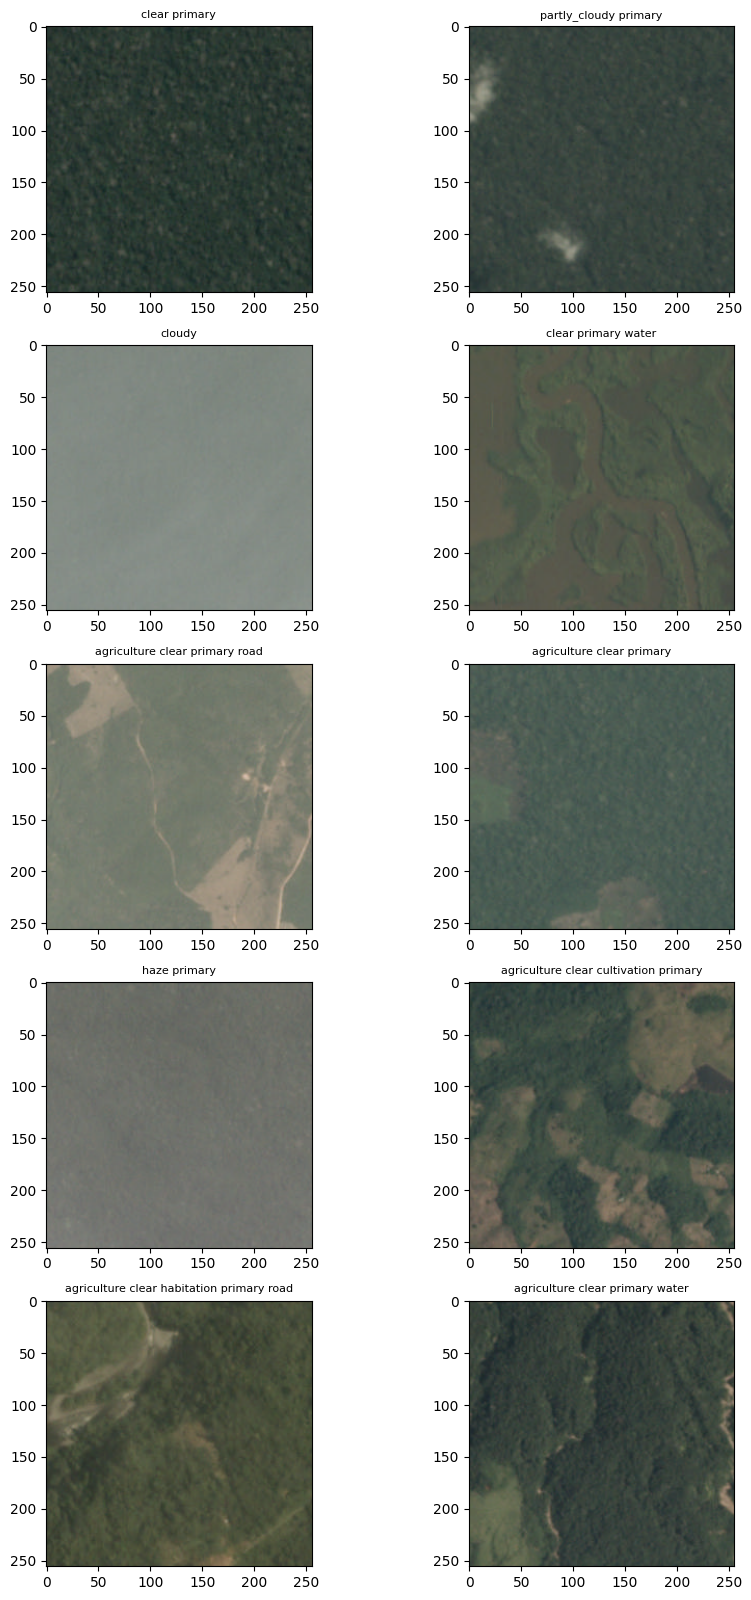

In [230]:
plot_images(top_10_classes)

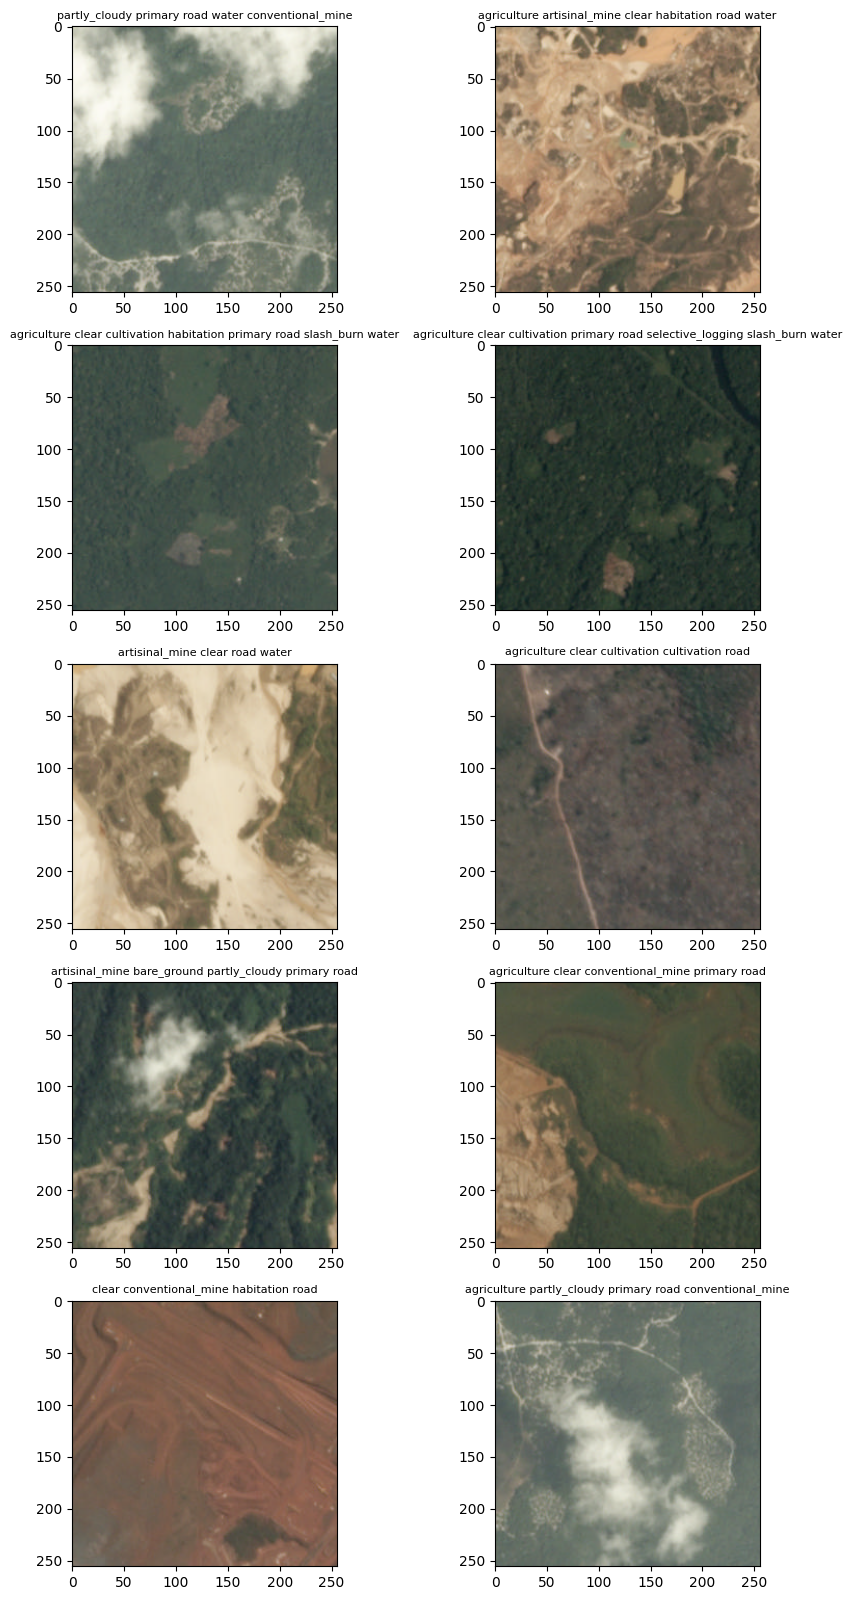

In [231]:
plot_images(last_10_classes)